In [1]:
from IPython.utils import io
with io.capture_output() as captured:

    !rm -Rf clipit
    
    # git clones
    
    !git clone https://github.com/openai/CLIP
    !git clone https://github.com/CompVis/taming-transformers.git
    !git clone https://github.com/dribnet/clipit
    !git clone https://github.com/BachiLi/diffvg
    %cd diffvg
    !git submodule update init recursive
    !python setup.py install
    %cd ..

    # general deps

    !pip install ftfy 
    !pip install regex 
    !pip install tqdm 
    !pip install omegaconf 
    !pip install pytorch-lightning
    !pip install kornia
    !pip install imageio-ffmpeg   
    !pip install einops
    !pip install torch-optimizer
    !pip install easydict
    !pip install braceexpand
    !pip install git+https://github.com/pvigier/perlin-numpy

    # clipdraw deps

    !pip install svgwrite
    !pip install svgpathtools
    !pip install cssutils
    !pip install numba
    !pip install torch-tools
    !pip install visdom

# put stuff in here that should only happen once

import os
if not os.path.isfile("init flag"):
    os.mknod("init flag")
    !mkdir -p models


Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

8.19kB [00:00, 277kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt


100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 128MiB/s]
100%|███████████████████████████████████████| 335M/335M [00:10<00:00, 34.1MiB/s]


Using device: cuda:0
Optimising using: Adam
Using text prompts: ['hello world']
Using seed: 3363364545454285268


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


iter: 0, loss: 1.7484, losses: 0.872351, 0.876052


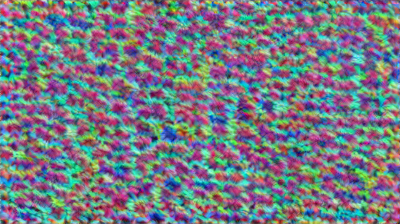

iter: 10, loss: 1.71344, losses: 0.857277, 0.856166
iter: 20, loss: 1.67112, losses: 0.836753, 0.834365


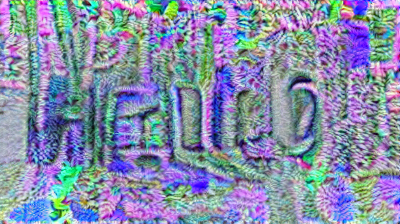

iter: 30, loss: 1.62433, losses: 0.814788, 0.809537
iter: 40, loss: 1.58035, losses: 0.791961, 0.78839


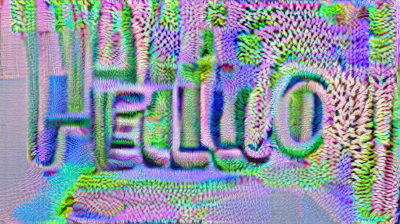

iter: 50, loss: 1.61746, losses: 0.813103, 0.804357
iter: 60, loss: 1.55797, losses: 0.781312, 0.776659


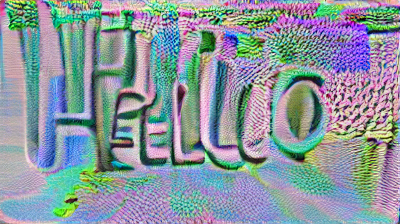

iter: 70, loss: 1.5688, losses: 0.787923, 0.780879
iter: 80, loss: 1.58837, losses: 0.801584, 0.786789


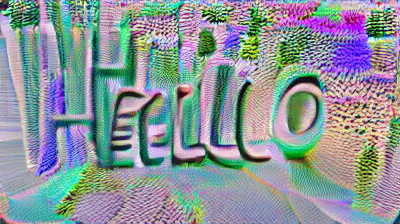

iter: 90, loss: 1.54508, losses: 0.777505, 0.767572
iter: 100, loss: 1.54328, losses: 0.776799, 0.76648


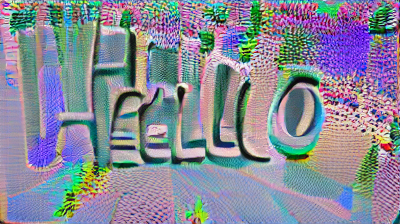

iter: 110, loss: 1.58703, losses: 0.798739, 0.788288
iter: 120, loss: 1.58636, losses: 0.799144, 0.787215


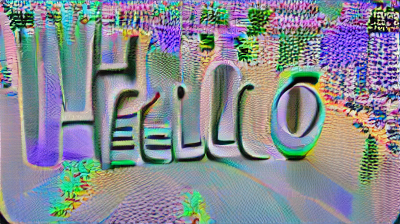

iter: 130, loss: 1.53639, losses: 0.77354, 0.76285
iter: 140, loss: 1.56455, losses: 0.788589, 0.775965


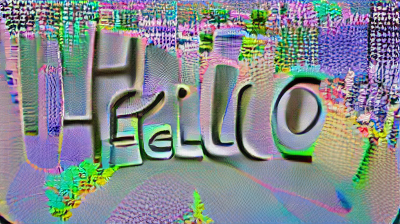

iter: 150, loss: 1.57496, losses: 0.792868, 0.782089
iter: 160, loss: 1.57981, losses: 0.793283, 0.786525


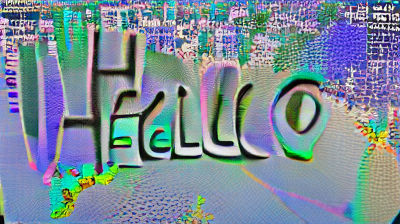

iter: 170, loss: 1.56406, losses: 0.787027, 0.777035
iter: 180, loss: 1.577, losses: 0.794025, 0.78298


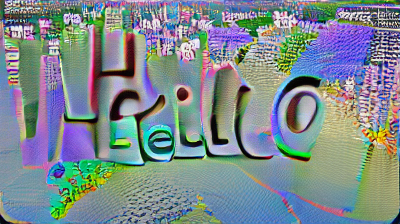

iter: 190, loss: 1.56463, losses: 0.785801, 0.778832
iter: 200, loss: 1.55546, losses: 0.783987, 0.77147


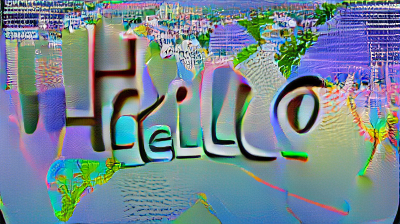

iter: 210, loss: 1.57629, losses: 0.789858, 0.786437
iter: 220, loss: 1.55819, losses: 0.781126, 0.777061


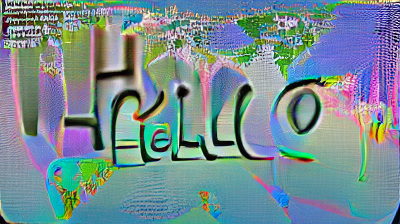

iter: 230, loss: 1.55221, losses: 0.780684, 0.771523
iter: 240, loss: 1.55274, losses: 0.779929, 0.772812


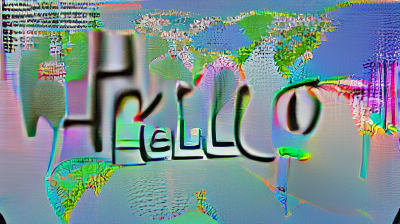

iter: 250, loss: 1.54552, losses: 0.777116, 0.768404
iter: 260, loss: 1.50622, losses: 0.756562, 0.749659


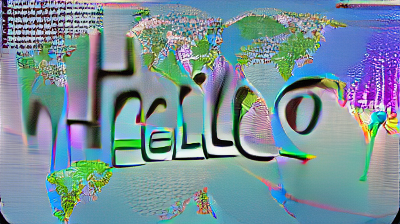

iter: 270, loss: 1.54711, losses: 0.778193, 0.768915
iter: 280, loss: 1.51516, losses: 0.759687, 0.755477


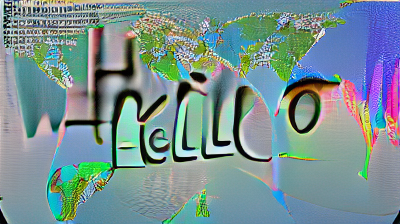

iter: 290, loss: 1.55556, losses: 0.780401, 0.775156
iter: 300, loss: 1.50285, losses: 0.755864, 0.746987


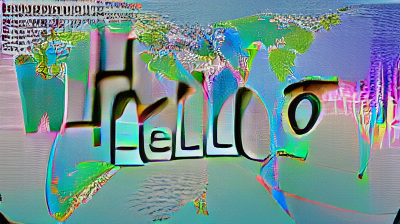

iter: 310, loss: 1.55035, losses: 0.780406, 0.769939
iter: 320, loss: 1.55401, losses: 0.778342, 0.77567


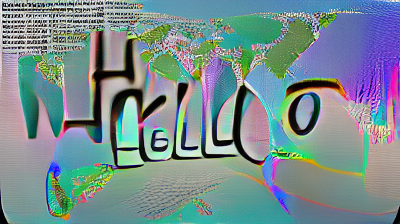

iter: 330, loss: 1.50434, losses: 0.75575, 0.748593
iter: 340, loss: 1.54549, losses: 0.778325, 0.767161


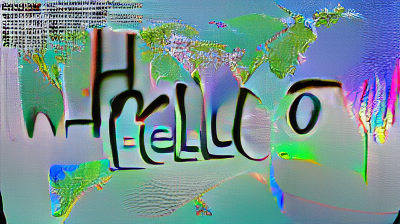

iter: 350, loss: 1.5382, losses: 0.77412, 0.764077


In [8]:
'''
settings that were removed:
  - spot
  - spot_off
  - cut_power
  - video
  - deterministic
'''

# run

import sys
sys.path.append("clipit")
import cli

clipit.reset_settings()
clipit.add_settings(
    prompts                    = 'hello world', # str
    spot_file                  = None, # str
    labels                     = [], # list[str]
    image_prompts              = [], # list[str]
    image_prompt_weight        = None, # float
    image_prompt_shuffle       = False, # bool
    image_labels               = None, # str
    image_label_weight         = 1.0, #float
    iterations                 = None, # int
    save_every                 = 10, # int
    display_every              = 20, # int
    overlay_every              = None, # int
    overlay_offset             = 0, # int
    overlay_image              = None, # str
    quality                    = 'normal', # str; [draft, normal, best]
    aspect                     = 'widescreen', # str; [widescreen, square]
    ezsize                     = None, # str; [small, medium, large]
    scale                      = None, # float; instead of ezsize
    overlay_alpha              = None, # int; 0-255    
    size                       = None, # list[int,int]; [width,height]
    pixel_size                 = None, # list[int,int]; [width,height]
    pixel_scale                = None, # float
    init_image                 = None, # str
    init_image_alpha           = 200, # int; 0-255
    init_noise                 = 'pixels', # str; [pixels, gradient]
    target_images              = None, # str
    target_image_weight        = 1.0, # float
    target_weight_pix          = 0.0, # float
    animation_dir              = None, # str; output dir    
    animation_alpha            = 128, # int; blending
    init_weight                = None, # float
    init_weight_dist           = 0.0, # float; distribution loss 
    init_weight_cos            = 0.0, # float; cosine loss
    init_weight_pix            = 0.0, # float
    clip_models                = None, # str
    vqgan_model                = 'imagenet_f16_16384', # str; [imagenet_f16_16384,]
    vqgan_config               = None, # str
    vqgan_checkpoint           = None, # str
    noise_prompt_seeds         = [], # list[int]
    noise_prompt_weights       = [], # list[float]
    learning_rate              = 0.2, # float
    num_cuts                   = None, # int
    batches                    = 1, # int; batches of cuts 
    seed                       = None, # int
    optimiser                  = 'Adam', # str; [Adam, AdamW, Adagrad, Adamax, DiffGrad, AdamP, RAdam]
    output                     = 'output.png', # str
    use_clipdraw               = False, # bool
    strokes                    = 1024, # int; clipdraw strokes
    use_pixeldraw              = False, # bool
    do_mono                    = False, # bool; monochromatic
    enforce_palette_annealing  = 5000, # int
    target_palette             = None, # str
    enforce_smoothness         = 0, # int
    enforce_smoothness_type    = 'default', # str; [default, clipped, log]
    enforce_saturation         = 0, # int
)
settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)

In [1]:
!pwd

/content
